## EMNIST con MNIST features

En esta notebook se entrena una red, utilizando los features aprendidos de la base de datos del MNIST, para clasificar las clases de la base de datos de EMNIST, para ello se divide la red en la parte de feature layers de las capas convolucionales y la parte de clasificación de las capas densas. Se copian los pesos de las capas convolucionales aprendidos de MNIST y se entrenan los pesos de las capas de clasificación, obteniendo finalmente un accuracy de 93.68% para 15 épocas.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import imageio
from scipy.misc import imread, imsave, imresize
import PIL
from PIL import Image
from skimage import transform,io
from resizeimage import resizeimage
import scipy.io as sio
import scipy.misc
from skimage.transform import rescale, resize as rs, downscale_local_mean


/home/cuchuflito/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
model=load_model('model_mnist.h5')


In [3]:
def impr(word):
    print ('\033[1m' + word + '\033[0m')
font = {'family': 'serif',
        'color':  'black',
        'weight': 15,
        'size': 16,
        }
file=sio.loadmat('emnist-letters.mat')


In [4]:
train=file['dataset'][0,0][0][0][0][0]
train_labels=file['dataset'][0,0][0][0][0][1]
test=file['dataset'][0,0][1][0][0][0]
test_labels=file['dataset'][0,0][1][0][0][1]
labels_train=[]
labels_test=[]
for i in train_labels:
    labels_train=np.append(labels_train,int(i[0]))
for i in test_labels:
    labels_test=np.append(labels_test,int(i[0]))

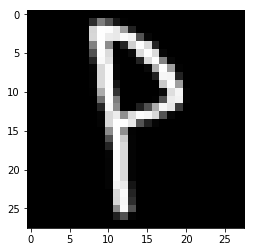

In [22]:
plt.imshow(np.rot90(train[490].reshape(28,28)),cmap='gray')
plt.show()
from matplotlib.pyplot import *
imsave('p.png',np.rot90(train[490].reshape(28,28)),cmap='gray')

In [26]:
train_labels=labels_train-1   #empieza en 1 los labels----> les resto uno, sino hay problemas con el to_categorical 
test_labels=labels_test-1


In [27]:
img_rows, img_cols = 28, 28
train = train.reshape(train.shape[0], 28, 28, 1).astype('float32')/255
test= test.reshape(test.shape[0], img_rows, img_cols, 1).astype('float32')/255

In [13]:
for layers in model.layers:
	layers.trainable=False
model.layers[-1].trainable=True
model.layers[-3].trainable=True
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
train_labels = keras.utils.to_categorical(train_labels,26)
test_labels = keras.utils.to_categorical(test_labels,26)

In [21]:
hist=model.fit(train,train_labels,batch_size=128*4, epochs=20, verbose=1, validation_data=(test,test_labels))

Train on 124800 samples, validate on 20800 samples
Epoch 1/20
124800/124800 [==============================] - 150s 1ms/step - loss: 1.7429 - acc: 0.4900 - val_loss: 0.5365 - val_acc: 0.8517
Epoch 2/20
124800/124800 [==============================] - 152s 1ms/step - loss: 0.8231 - acc: 0.7456 - val_loss: 0.3759 - val_acc: 0.8877
Epoch 3/20
124800/124800 [==============================] - 157s 1ms/step - loss: 0.6355 - acc: 0.8023 - val_loss: 0.3232 - val_acc: 0.9000
Epoch 4/20
124800/124800 [==============================] - 146s 1ms/step - loss: 0.5553 - acc: 0.8266 - val_loss: 0.2947 - val_acc: 0.9074
Epoch 5/20
124800/124800 [==============================] - 149s 1ms/step - loss: 0.5032 - acc: 0.8426 - val_loss: 0.2779 - val_acc: 0.9121
Epoch 6/20
124800/124800 [==============================] - 146s 1ms/step - loss: 0.4670 - acc: 0.8534 - val_loss: 0.2691 - val_acc: 0.9172
Epoch 7/20
124800/124800 [==============================] - 150s 1ms/step - loss: 0.4474 - acc: 0.8589 - val_

In [22]:
import json
with open('EMNIST_with_MNIST_features.json', 'w') as f:
    json.dump(hist.history, f)


In [28]:
for layers in model.layers:
	layers.trainable=False
model.layers[-1].trainable=True
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

In [29]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
train_labels = keras.utils.to_categorical(train_labels,26)
test_labels = keras.utils.to_categorical(test_labels,26)
hist=model.fit(train,train_labels,batch_size=128*4, epochs=20, verbose=1, validation_data=(test,test_labels))

Train on 124800 samples, validate on 20800 samples
Epoch 1/20
124800/124800 [==============================] - 133s 1ms/step - loss: 3.9209 - acc: 0.2677 - val_loss: 1.4629 - val_acc: 0.6112
Epoch 2/20
124800/124800 [==============================] - 134s 1ms/step - loss: 1.6521 - acc: 0.5330 - val_loss: 1.1911 - val_acc: 0.6965
Epoch 3/20
124800/124800 [==============================] - 134s 1ms/step - loss: 1.4988 - acc: 0.5725 - val_loss: 1.1193 - val_acc: 0.7137
Epoch 4/20
124800/124800 [==============================] - 139s 1ms/step - loss: 1.4548 - acc: 0.5850 - val_loss: 1.0848 - val_acc: 0.7174
Epoch 5/20
124800/124800 [==============================] - 141s 1ms/step - loss: 1.4316 - acc: 0.5891 - val_loss: 1.0628 - val_acc: 0.7224
Epoch 6/20
124800/124800 [==============================] - 134s 1ms/step - loss: 1.4179 - acc: 0.5933 - val_loss: 1.0501 - val_acc: 0.7246
Epoch 7/20
124800/124800 [==============================] - 133s 1ms/step - loss: 1.4059 - acc: 0.5962 - val_

In [30]:
import json
with open('EMNIST_with_MNIST_features_1.json', 'w') as f:
    json.dump(hist.history, f)


NameError: name 'model' is not defined